# Plotting circles

Let's explore some patterns, inspired by https://www.youtube.com/watch?v=qhbuKbxJsk8.

## Imports

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import ipywidgets as widgets
from IPython.display import display

In [2]:
# Default settings for pyplot (plt)
mpl.rcParams["figure.figsize"] = [10, 10]  # Square

## First attempt

Let us try and map the multiplication table for 10 points on the circle, step-by-step.

### Plotting a circle

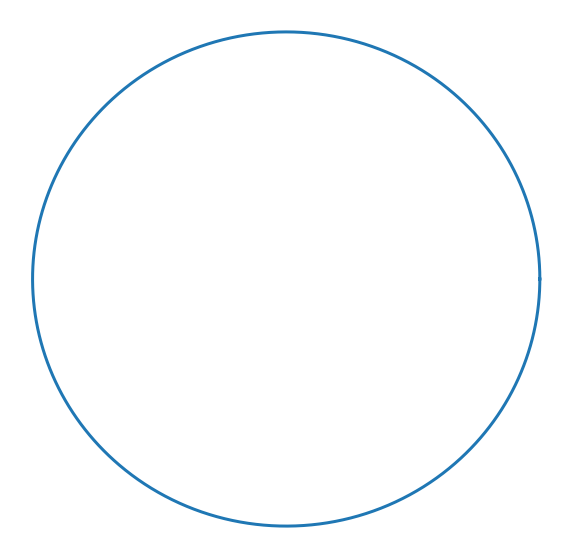

In [3]:
t = np.linspace(0, 2 * np.pi, 2000)

fig = plt.figure()
plt.plot(np.cos(t), np.sin(t), lw=3)
plt.axis("off")
plt.show()

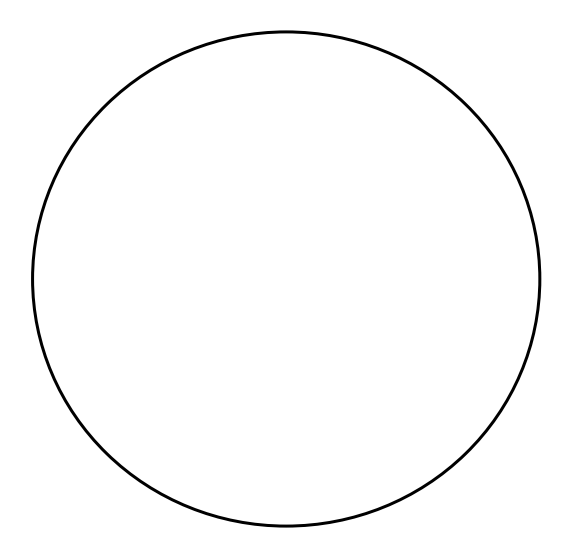

In [4]:
circle = plt.Circle((0, 0), 1., facecolor="w", edgecolor="k", lw=3)

fig = plt.figure()
ax = plt.gca()
ax.add_patch(circle)

plt.axis("off")

axis_margin = 0.1
axis_lim = 1 + axis_margin
plt.xlim([-axis_lim, axis_lim])
plt.ylim([-axis_lim, axis_lim])

plt.show()

### Adding modulo points

In [5]:
mod_number = 11
phase = np.pi

angles = np.arange(mod_number) * 2 * np.pi / mod_number + phase
mod_points_x = np.cos(angles)
mod_points_y = np.sin(angles)

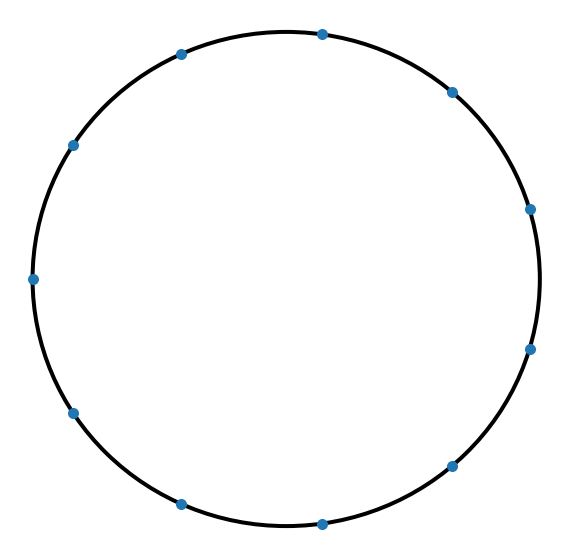

In [6]:
circle = plt.Circle((0, 0), 1., facecolor="w", edgecolor="k", lw=4)

fig = plt.figure()

ax = plt.gca()
ax.add_patch(circle)

plt.plot(mod_points_x, mod_points_y, "o", ms=10)

plt.axis("off")

axis_margin = 0.1
axis_lim = 1 + axis_margin
plt.xlim([-axis_lim, axis_lim])
plt.ylim([-axis_lim, axis_lim])

plt.show()

### Multiplication table of 2

In [7]:
mod_number = 11
multiplier = 2
phase = np.pi

# Points on circle
angles = np.arange(mod_number) * 2 * np.pi / mod_number + phase
mod_points_x = np.cos(angles)
mod_points_y = np.sin(angles)

# Mapping points
root_number = np.arange(mod_number)
mapped_number = (root_number * multiplier) % mod_number

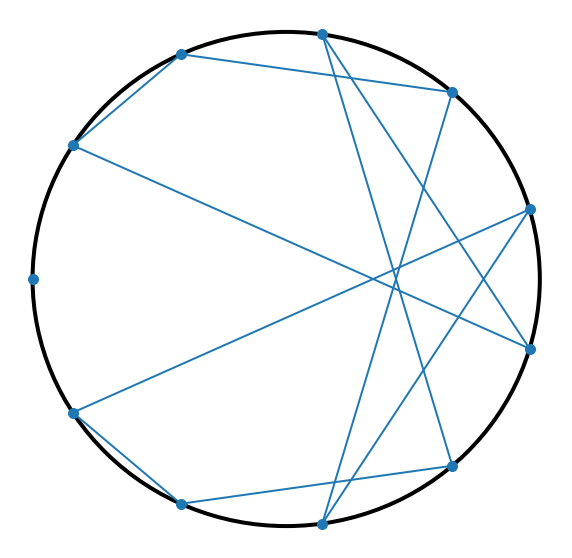

In [8]:
circle = plt.Circle((0, 0), 1., facecolor="w", edgecolor="k", lw=4)

fig = plt.figure()

ax = plt.gca()
ax.add_patch(circle)

points, = plt.plot(mod_points_x, mod_points_y, "o", ms=10)
for from_number, to_number in zip(root_number, mapped_number):
    x_coord = mod_points_x[from_number], mod_points_x[to_number]
    y_coord = mod_points_y[from_number], mod_points_y[to_number]
    ax.plot(x_coord, y_coord, c=points.get_color(), lw=2)

plt.axis("off")

axis_margin = 0.1
axis_lim = 1 + axis_margin
plt.xlim([-axis_lim, axis_lim])
plt.ylim([-axis_lim, axis_lim])

plt.show()

### Function that up

In [9]:
def plot_times_table(mod_number, single_multiplier, line_width=2):
    """Plots the times tables on a circle."""
    
    color = None
    phase = np.pi

    # Points on circle
    angles = np.arange(mod_number) * 2 * np.pi / mod_number + phase
    mod_points_x = np.cos(angles)
    mod_points_y = np.sin(angles)

    # Mapping points
    root_number = np.arange(mod_number)
        
    # Circle
    circle = plt.Circle((0, 0), 1., facecolor="w", edgecolor="k", lw=4)

    # Actual plotting
    fig = plt.figure()

    ax = plt.gca()
    ax.add_patch(circle)

    points, = plt.plot(mod_points_x, mod_points_y, "o", ms=5*line_width, color=color)
    
    def plot_times_table_for_single_multiplier(multiplier):
        
        mapped_number = (root_number * multiplier) % mod_number
        
        for from_number, to_number in zip(root_number, mapped_number):
            x_coord = mod_points_x[from_number], mod_points_x[to_number]
            y_coord = mod_points_y[from_number], mod_points_y[to_number]
            ax.plot(x_coord, y_coord, c=points.get_color(), lw=line_width)
            
    plot_times_table_for_single_multiplier(single_multiplier)

    plt.axis("off")

    axis_margin = 0.1
    axis_lim = 1 + axis_margin
    plt.xlim([-axis_lim, axis_lim])
    plt.ylim([-axis_lim, axis_lim])

    plt.show()

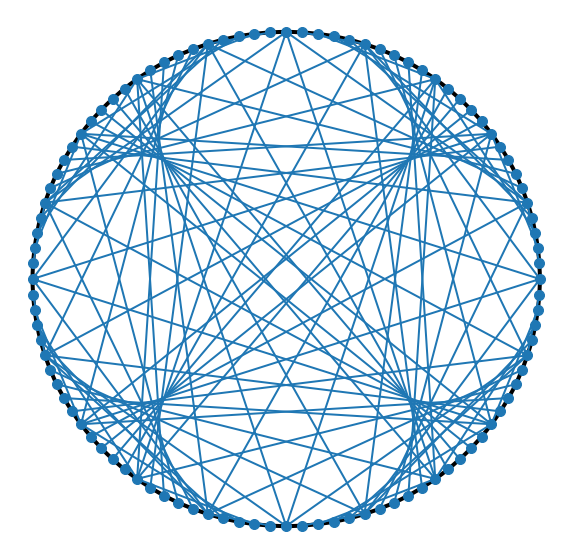

In [10]:
plot_times_table(100, 5)

## Interactive

In [12]:
mod_number_slider = widgets.IntSlider(800, 3, 800, 1, description="Mod number")
multiplier_slider = widgets.IntSlider(673, 2, 800, 1, description="Multiplier")
line_width_slider = widgets.FloatSlider(0.20, min=0.10, max=2., description="Line width")


widgets.interact(
    plot_times_table, 
    mod_number=mod_number_slider, 
    single_multiplier=multiplier_slider, 
    line_width=line_width_slider,
    continuous_update=False
);

interactive(children=(IntSlider(value=800, description='Mod number', max=800, min=3), IntSlider(value=673, des…